# Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones

## Introducción al aprendizaje automático

## Edición 2024


#### Entregable N° 2: Análisis Exploratorio y Curación

#### GRUPO N° 30

Integrantes:

Fernando Camino

Emanuel Nicolás Herrador

Juana Rapoport

Sebastián Stutz

Juan Ignacio Szurlewicz


# Laboratorio 1: Regresión en California

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "California Housing dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, RobustScaler
from sklearn.pipeline import make_pipeline
pd.options.display.float_format = '{:.20f}'.format

En primer lugar, vamos a cargar el dataset que nos provee sklearn, y vamos a analizar sus features, la variable objetivo, etc.


In [2]:
X_california, y_california = fetch_california_housing(
    return_X_y=True, as_frame=True)

california = fetch_california_housing(as_frame=True)

In [3]:
# Aquí podemos ver los distintos componentes, podemos analizar el target, el frame, las features.
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

1. Descripción


In [4]:
print(california['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

2. Features


In [5]:
print(california['feature_names'])

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


3. Data


In [6]:
print(california['data'])

                      MedInc                HouseAge               AveRooms  \
0     8.32520000000000059970 41.00000000000000000000 6.98412698412698418338   
1     8.30139999999999922409 21.00000000000000000000 6.23813708260105403980   
2     7.25739999999999962910 52.00000000000000000000 8.28813559322033910348   
3     5.64309999999999956088 52.00000000000000000000 5.81735159817351554778   
4     3.84620000000000006324 52.00000000000000000000 6.28185328185328195616   
...                      ...                     ...                    ...   
20635 1.56030000000000002025 25.00000000000000000000 5.04545454545454585826   
20636 2.55679999999999996163 18.00000000000000000000 6.11403508771929793397   
20637 1.69999999999999995559 17.00000000000000000000 5.20554272517320981706   
20638 1.86719999999999997087 18.00000000000000000000 5.32951289398280803056   
20639 2.38859999999999983444 16.00000000000000000000 5.25471698113207530412   

                   AveBedrms                Populat

4. Target


In [7]:
print(california['target'])

0       4.52599999999999980105
1       3.58499999999999996447
2       3.52099999999999990763
3       3.41299999999999981171
4       3.42200000000000015277
                 ...          
20635   0.78100000000000002753
20636   0.77100000000000001865
20637   0.92300000000000004263
20638   0.84699999999999997513
20639   0.89400000000000001688
Name: MedHouseVal, Length: 20640, dtype: float64


Chequeamos si existen valores faltantes para la variable target o para alguno de los atributos


In [8]:
california['data'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación, haciendo uso de la propia herramienta de sklearn.


In [9]:
X, y = california['data'], california['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

In [10]:
y.shape

(20640,)

In [11]:
y_test.shape

(4128,)

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**


### <u>_Resolución Ejercicio 1_</u>


1. El conjunto de datos es el resultado de una muestra extraida del censo de 1990 en California, Estados Unidos. Especificamente, fueron creados "Bloques", compuestos por 1425.5 individuos u observaciones del censo, agrupandolos por zona geográfica compacta. A mayor densidad poblacional, menor el tamaño de la zona geográfica compacta y por ende mas zonas tendremos y viceversa.


2. La variable objetivo a predecir es la mediana del valor de las casas, expresado en cientos de miles de dólares ($\$100.000$ USD). A priori, podemos pensar que según la zona geográfica compacta en la que nos encontremos, el valor medio de las propiedades puede diferer. Esta correlación podría ocurrir directamente entre la zona geográfica y el valor de las casas, o por medio de otras variables que tengan injerencia en cada zona geográfica, como por ejemplo el ingreso de las personas que habitan en ellas.


3. Contamos con los siguientes atributos:

- MedInc Ingresos medios por bloque geográfico
- HouseAge Antiguedad media de las propiedades por bloque geográfico
- AveRooms Cantidad media de ambientes por propiedad
- AveBedrms Cantidad media de habitaciones por propiedad
- Population Población total del bloque geográfico
- AveOccup Cantidad media de personas por unidad familiar
- Latitude Latitud del bloque geográfico
- Longitude Longitud del bloque geográfico


4. A priori, podemos pensar que los atributos más relevantes para considerar en una regresión para estimar el precio de las viviendas podrían ser: la antiguedad media de la propiedad, la cantidad media de ambientes, la cantidad media de habitaciones y los ingresos medios por bloque geográfico. Los primeros 3 atributos, están directamente relacionas con las características de una propiedad y que suelen tener una relación directa con el precio. En cuanto al 4to atributo, podría estar relacionado con el precio de la propiedad por medio de características como el mantenimiento, la calidad de construcción, entre otros.


5. Logramos identificar los siguientes riesgos y problemas potenciales:

- Según menciona la documentación, fueron excluidos los bloques en los cuáles no hubo ningun ingreso de datos en alguna de las variables independientes. Sería mejor hacer un análisis más profundo acerca de la razón por la cuál no fueron relevadas ciertos atributos. Quizás sería un problema para otro tipo de investigaciones y no afecte tanto la predicción del precio de la propiedad.
- Muestreo realizado hace 34 años, con lo cuál la situación actual puede haber cambiado notoramiente y los datos no sean representativos para estimar correctamente los valores actuales de las propiedades.
- Presencia de multicolinealidad por correlación alta entre variables, como rooms y bedrooms.
- Al armar bloques por cantidad de individuos, los bloques con menor densidad estarían relevando areas geográficas mas grandes y por ende podrían estar influenciados por diferentes estratos dentro de la misma zona, afectando la estimación del precio.
- Datos representativos sólo de California, podrían no ser extrapolables a otros estados/regiones.
- Como dilemas éticos, se debería tener cuidado de utilizar estas informaciones para generalizar y aplicar políticas públicas. Por ejemplo, decidir una alicuota mayor al mobiliario para aquellos bloques donde las propiedas son mas caras, sin tener en cuenta los ingresos de las familias.
- Por otro lado, estas predicciones pueden perpetuar desigualdades históricas, sobre todo si no se actualizan los datos. Por ejemplo, si para otorgar créditos hipotecarios los bancos hacen un analisis de los precios de las propiedades mediante estos bloques, los mismos puede que no sean otorgados y por ende no podrán renovar las casas o adquirir nuevas, hacer remodelaciones, etc. Lo mismo puede suceder para atraer inversiones comerciales, generando una menor calidad de vida.


## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.


### <u>_Resolución Ejercicio 2_</u>


Para analizar de forma gráfica la existencia alguna relación entre la variable objetivo y las posibles variables explicativas, vamos a realizar gráficos pairplot de la libreria seaborn, realizando uno para cada combinación de variable explicativa-objetivo. Pero en primer lugar, detectamos mediante el uso de boxplots la presencia de valores outliers y los exluimos del análisis mediante percentiles, sólo a fines de tener una visualización más limpia, ya que a los fines del algortimo, ya hemos definido previamente nuestro conjunto de test y train.


In [12]:
# Convertimos los atributos y la variable target a dataframe
X_df = pd.DataFrame(X_california)
y_df = pd.DataFrame(y_california, columns=["MedHouseVal"])

# Unimos ambos dataframes en el mismo dataframe mediante un concat
california_df = pd.concat([X_df, y_df], axis=1)
california_df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.32520000000000059970,41.00000000000000000000,6.98412698412698418338,1.02380952380952372494,322.00000000000000000000,2.55555555555555535818,37.88000000000000255795,-122.23000000000000397904,4.52599999999999980105
1,8.30139999999999922409,21.00000000000000000000,6.23813708260105403980,0.97188049209138838158,2401.00000000000000000000,2.10984182776801398873,37.85999999999999943157,-122.21999999999999886313,3.58499999999999996447
2,7.25739999999999962910,52.00000000000000000000,8.28813559322033910348,1.07344632768361591957,496.00000000000000000000,2.80225988700564965228,37.85000000000000142109,-122.23999999999999488409,3.52099999999999990763
3,5.64309999999999956088,52.00000000000000000000,5.81735159817351554778,1.07305936073059360325,558.00000000000000000000,2.54794520547945202438,37.85000000000000142109,-122.25000000000000000000,3.41299999999999981171
4,3.84620000000000006324,52.00000000000000000000,6.28185328185328195616,1.08108108108108114109,565.00000000000000000000,2.18146718146718132658,37.85000000000000142109,-122.25000000000000000000,3.42200000000000015277


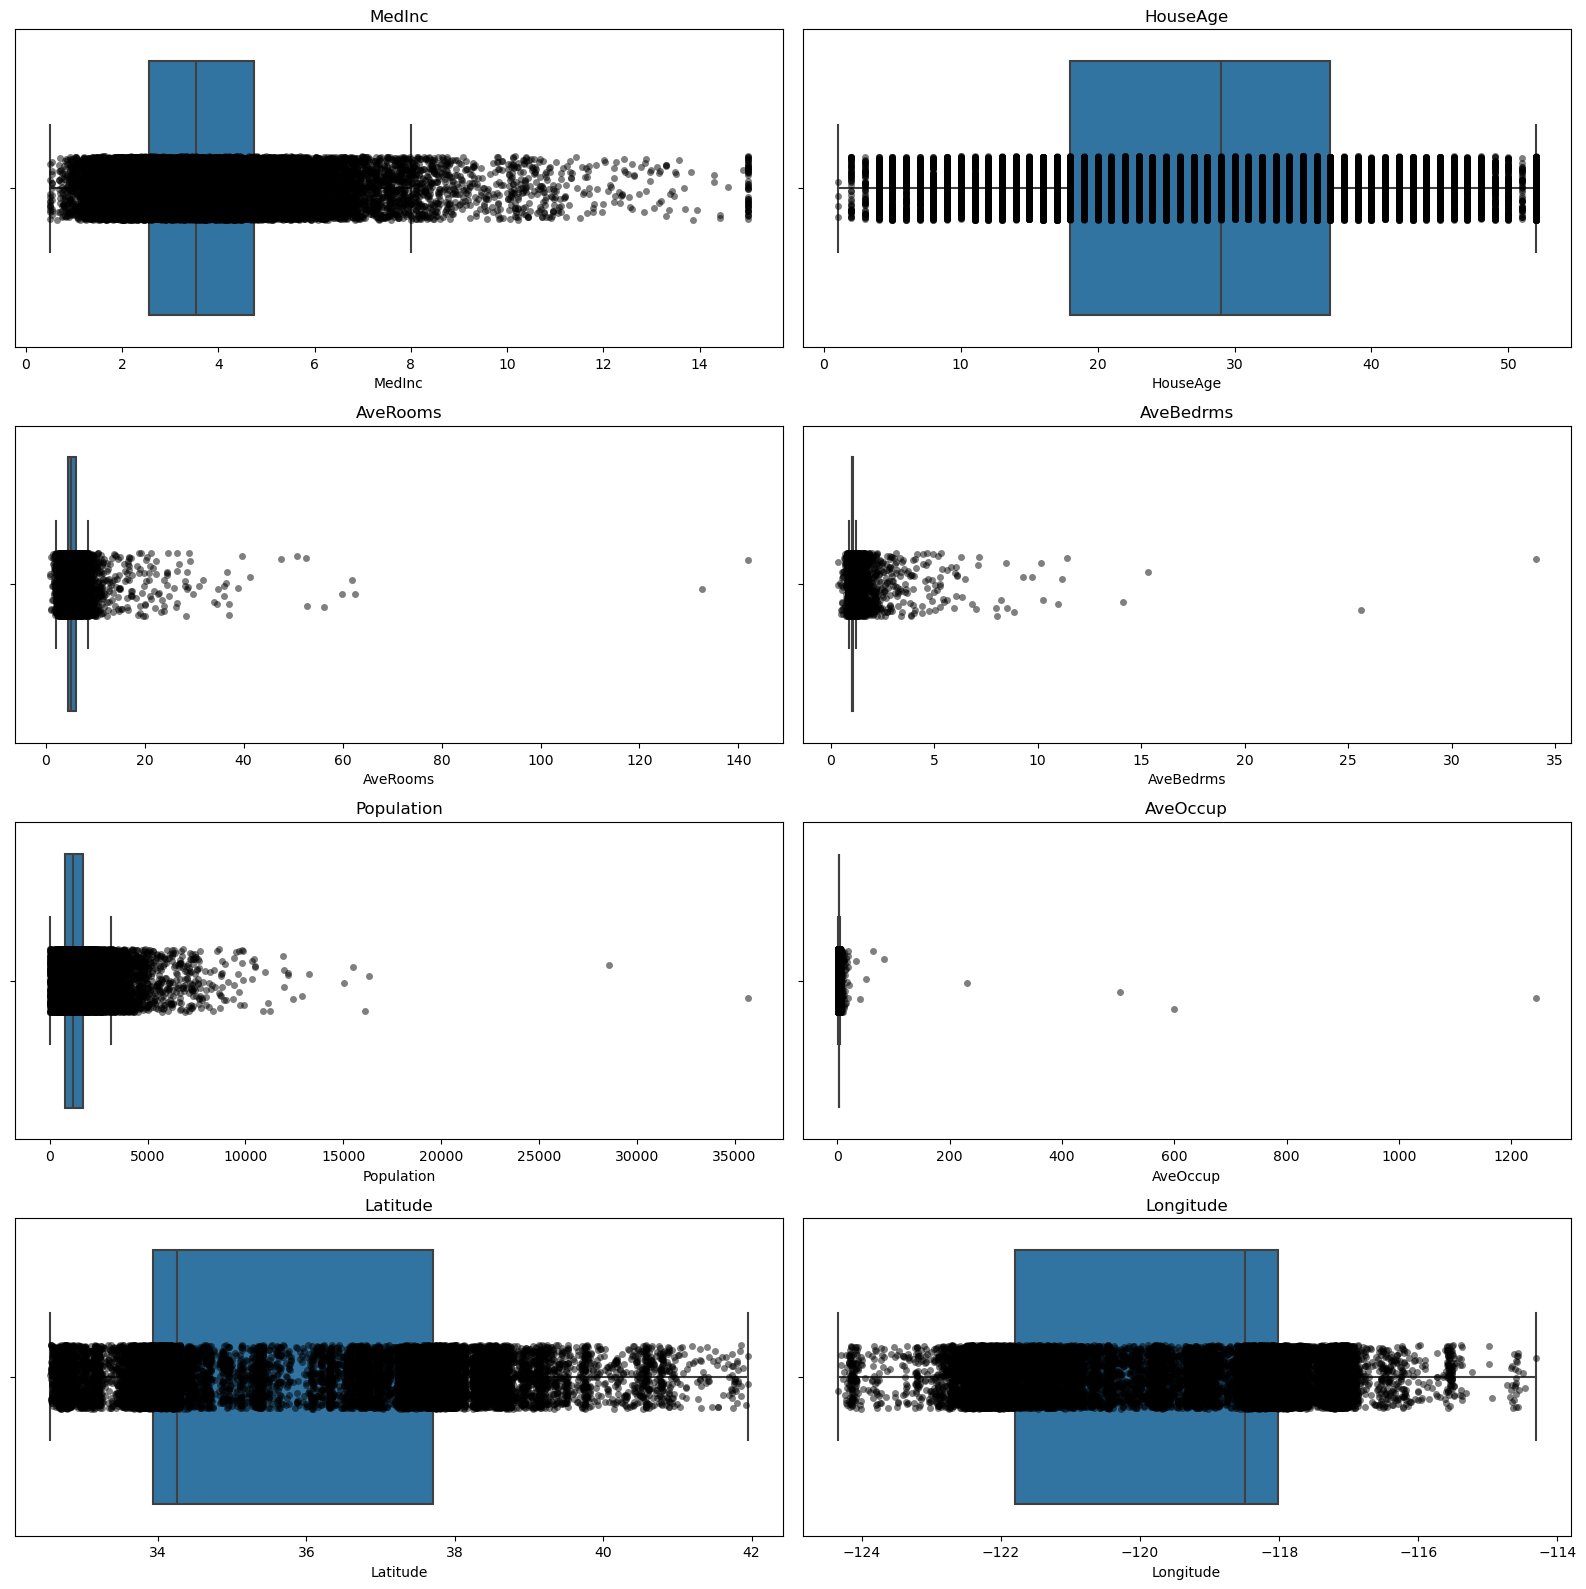

In [13]:
fig, axs = plt.subplots(4, 2, figsize=(16, 16))

warnings.filterwarnings('ignore', category=FutureWarning,
                        message="use_inf_as_na option is deprecated and will be removed in a future version")

_r = 0
_c = 0
for i in california['feature_names']:
    sns.boxplot(x=california_df[f'{i}'], showfliers=False, ax=axs[_r, _c])
    sns.stripplot(x=california_df[f'{i}'],
                  color='black', alpha=0.5, ax=axs[_r, _c])
    axs[_r, _c].set_title(f'{i}')
    _c += 1
    if _c == 2:
        _c = 0
        _r += 1

plt.tight_layout()

Podemos ver que existen valores outliers para las variables "Population","AveOccup",'AveRooms' y 'AveBedrms', por lo tanto vamos a considerar para ellas el precentil 0.99, suficiente para excluir dichos valores.


In [14]:
_list_variables_outliers = ['Population',
                            'AveOccup', 'AveRooms', 'AveBedrms', 'MedHouseVal']


for i in _list_variables_outliers:

    california_df = california_df[california_df[f'{
        i}'] <= california_df[f'{i}'].quantile(0.99)]


california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.32520000000000059970,41.00000000000000000000,6.98412698412698418338,1.02380952380952372494,322.00000000000000000000,2.55555555555555535818,37.88000000000000255795,-122.23000000000000397904,4.52599999999999980105
1,8.30139999999999922409,21.00000000000000000000,6.23813708260105403980,0.97188049209138838158,2401.00000000000000000000,2.10984182776801398873,37.85999999999999943157,-122.21999999999999886313,3.58499999999999996447
2,7.25739999999999962910,52.00000000000000000000,8.28813559322033910348,1.07344632768361591957,496.00000000000000000000,2.80225988700564965228,37.85000000000000142109,-122.23999999999999488409,3.52099999999999990763
3,5.64309999999999956088,52.00000000000000000000,5.81735159817351554778,1.07305936073059360325,558.00000000000000000000,2.54794520547945202438,37.85000000000000142109,-122.25000000000000000000,3.41299999999999981171
4,3.84620000000000006324,52.00000000000000000000,6.28185328185328195616,1.08108108108108114109,565.00000000000000000000,2.18146718146718132658,37.85000000000000142109,-122.25000000000000000000,3.42200000000000015277


1. Realizamos los Pairplot para observar la presencia o no de alguna relación, lineal o no, entre cada variable explicativa y la variable objetivo


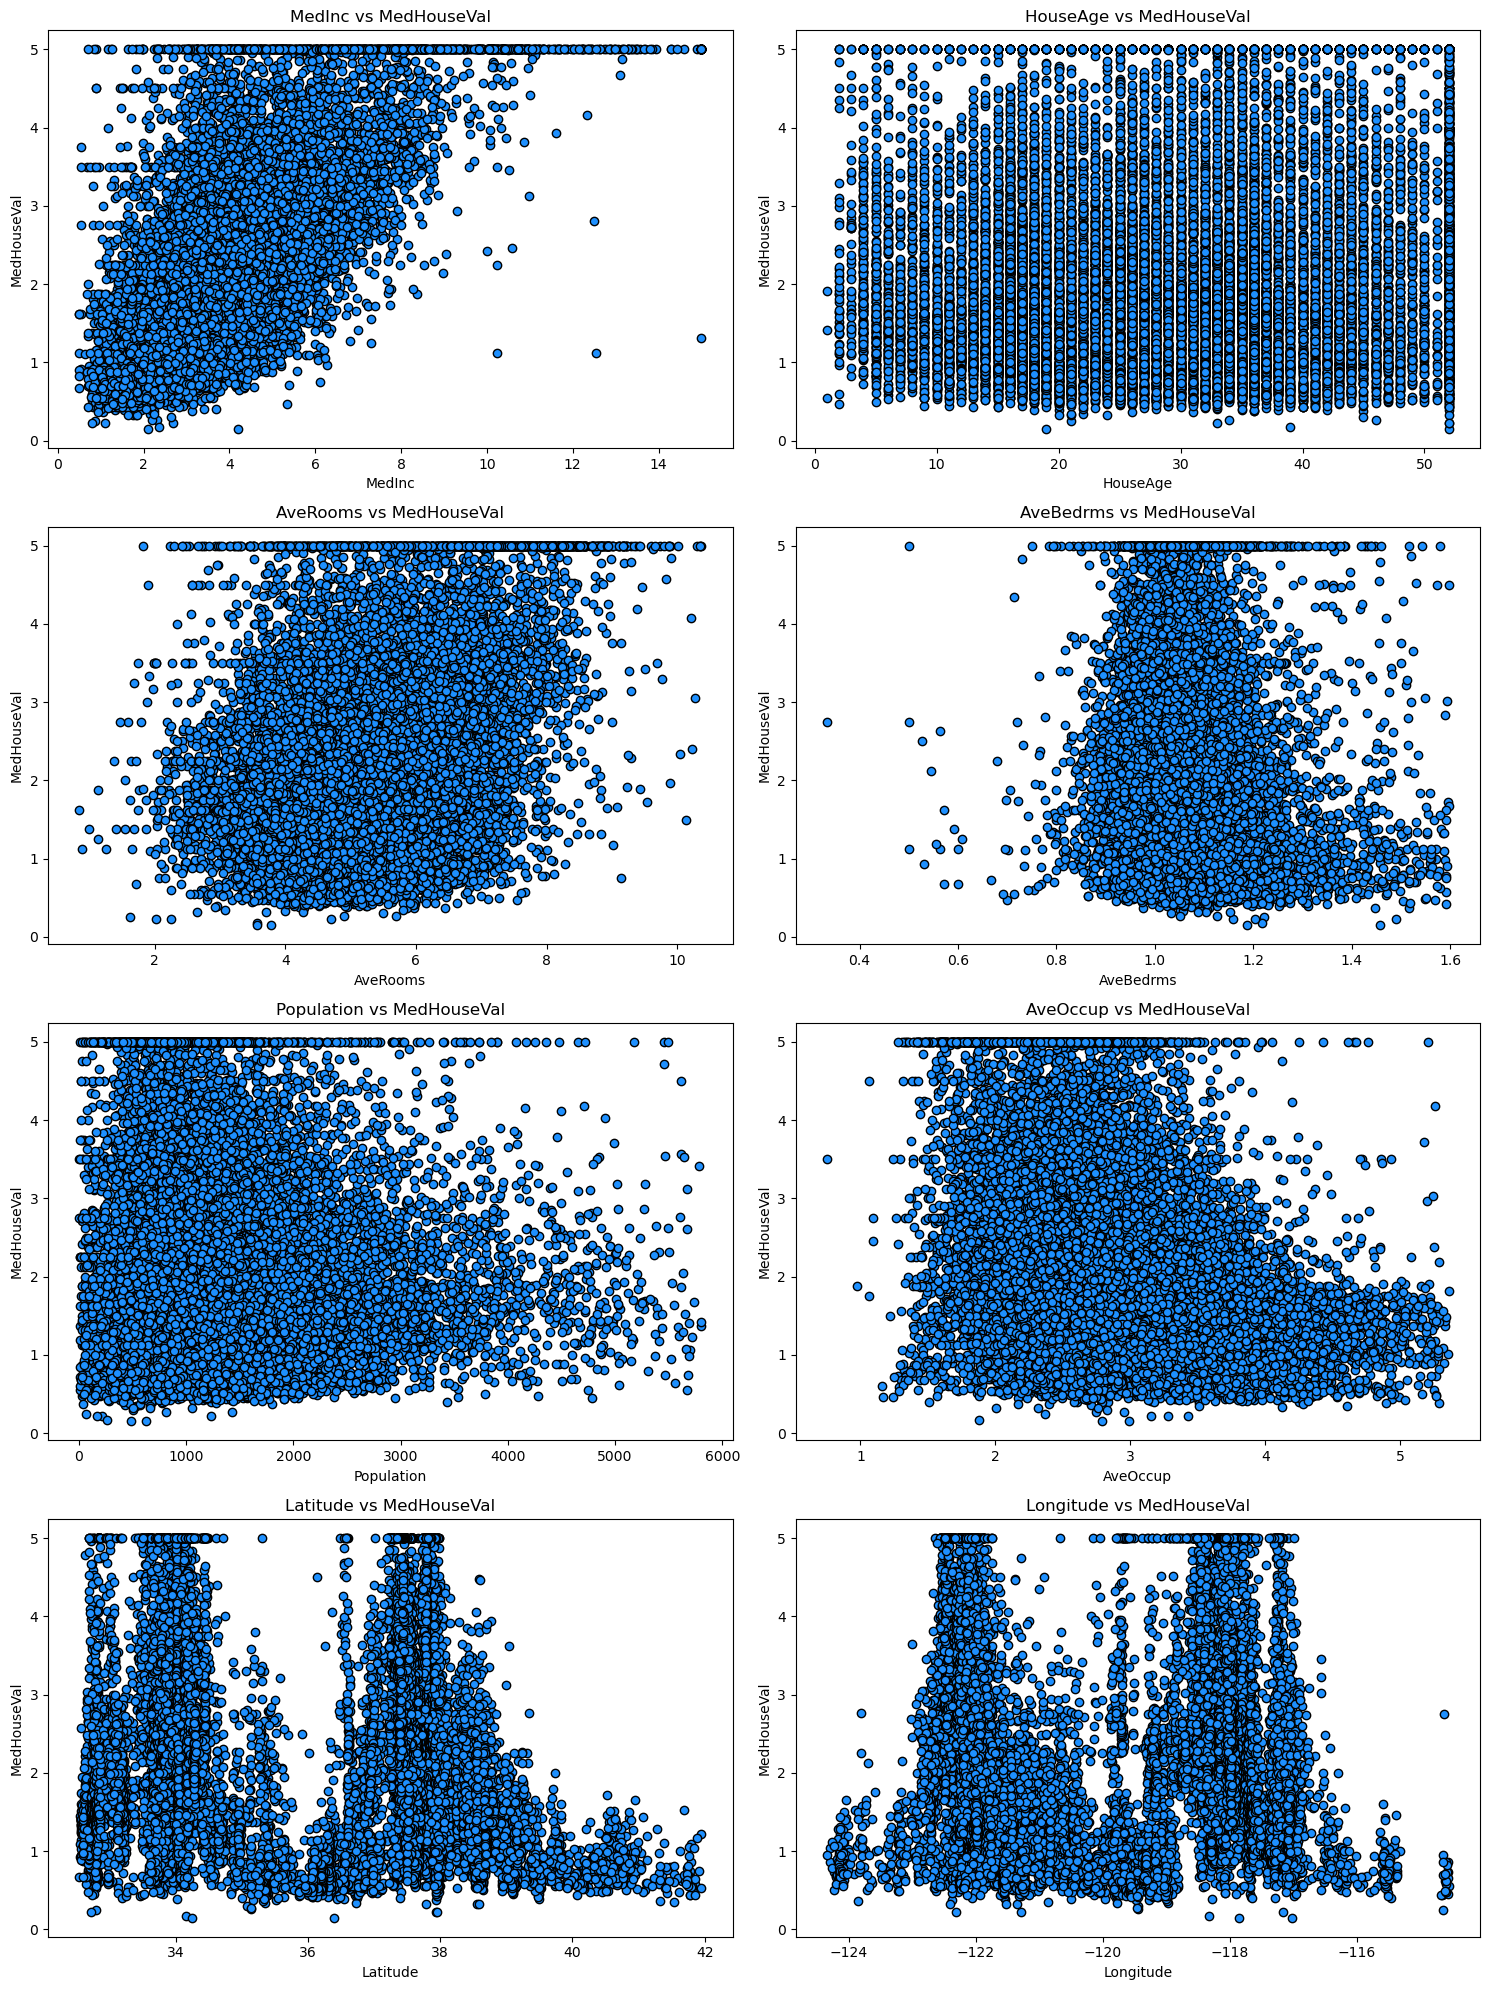

In [15]:
# Punto (1)
# Graficar la relación entre las características y el target
def plot_feature_vs_target(feature, target, feature_name, target_name, ax):
    ax.scatter(feature, target, facecolor="dodgerblue", edgecolor="k")
    ax.set_xlabel(feature_name)
    ax.set_ylabel(target_name)
    ax.set_title(f'{feature_name} vs {target_name}')


fig, axs = plt.subplots(4, 2, figsize=(15, 20))
for i, ax in enumerate(axs.flat):
    if i >= 8:
        break
    plot_feature_vs_target(
        california_df.iloc[:, i], california_df['MedHouseVal'], california_df.columns[i], "MedHouseVal", ax)

plt.tight_layout()
plt.show()

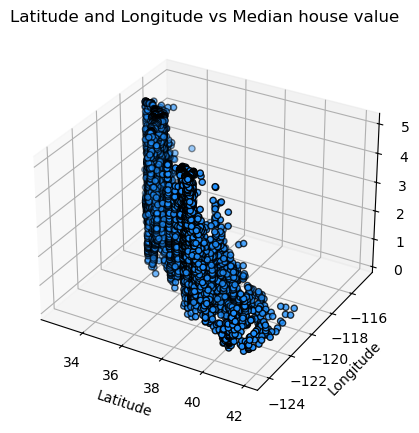

In [16]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(california_df['Latitude'], california_df['Longitude'],
           california_df['MedHouseVal'], facecolor="dodgerblue", edgecolor="k")
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Median house value')
ax.set_title('Latitude and Longitude vs Median house value')
plt.show()

2 y 3. Realizando el análisis exploratorio correspondiente, podemos hacer un análisis variable por variable:

- MedInc: Para esta variable que mide los ingresos medios por bloque geográfico se evidencia un patrón de relación lineal positiva, sobre todo sin tener en cuenta el valor outlier que ubica el valor de la propiedad en $500.000. Ubicamos esta variable como posible explicativa en el puesto n°1.
- HouseAge: No se evidencia ningun patrón, ni lineal, ni de ningún tipo. Para todos los valores de antigüedad, existen precios en todos los niveles. No parece ser una variable explicativa útil.
- AveRooms: Podría haber cierta correlación no lineal, entre 4 y 8 ambientes, existen observaciones para todos los niveles de precio, pero al aumentar de 8 el promedio las observaciones se concentran en los valores más altos y al disminuir de 4 ambientes promedio, las observaciones se concentran en los valores más bajos.Ubicamos esta variable como posible explicativa en el puesto n°4.
- AveBedrms: No observamos ninguna relación, los datos están muy dispersos.
- Population: Si bien no es posible observar una correlación lineal, pareciera haber un patrón de precios menores para zonas con mayor población. Ubicamos esta variable como posible explicativa en el puesto n°5.
- Aveoccup: No observamos ninguna relación, los datos están muy dispersos.
- Latitude y Longitude: Juntas, estas dos variables tienen una gran correlación con el precio medio de las casas de una manzana, dado que en este _dataset_, la ubicación de las casas resulta ser un factor determinante para el precio de las mismas. Por lo tanto, estas dos variables también son informativas para la predicción. Ubicamos estas variables como posibles explicativas en los puestos n°2 y n°3.


## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.


En primer lugar, vamos a definir nuevamente nuestros sub-conjuntos de datos de train y test, excluyendo los valores outliers, utilizando cómo método los percentiles, tomando el percentil 99 de las distruciones.


In [17]:
X, y = california_df.iloc[:, :-1], california_df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((15859, 8), (3965, 8))

Ahora, para la realización de la regresión lineal en cuestión, vamos a utilizar como atributo aquel que seleccionamos en el puesto n°1, que es la media de los ingresos de los habitantes de cada bloque geográfico.
Previamente, en las consignas, ya habiamos separado el conjunto de datos en train y test, con un porcentaje del 0,8 para el realizar el entrenamiento. Quedaría entonces, dejar en el vector de atributos "X_train" sólo el atributo en cuestión.


In [18]:
# Seleccionamos el atributo que queremos utilizar
feature = 'MedInc'
selector = california['feature_names'].index(feature)

# Acotamos las muestras de train y test al atributo en cuestión

X_train_feature = np.array(X_train[[feature]])
X_test_feature = np.array(X_test[[feature]])

X_train_feature

array([[3.6581],
       [3.5461],
       [2.1389],
       ...,
       [6.7528],
       [6.213 ],
       [2.9821]])

Vamos a escalar los features mediante el método RobustScalar de Sklearn, el cuál es menos sensible a outliers (que vimos que existen)


In [19]:
scaler = RobustScaler()

X_train_feature = scaler.fit_transform(X_train_feature)
X_test_feature = scaler.fit_transform(X_test_feature)

In [20]:
# Armamos el modelo,incluyendo el intercepto
model_one_feature = LinearRegression(fit_intercept=True)

In [21]:
# Ajustamos el modelo con los datos de entrenamiento
model_one_feature.fit(X_train_feature, y_train)

LinearRegression()

In [22]:
# Obtenemos la función lineal para el atributo "Media de los ingresos"
print(
    f'f(x) = {model_one_feature.intercept_} + ({model_one_feature.coef_[0]}) * x')

f(x) = 1.9446547642616632 + (0.9318907860215957) * x


Podemos evaluar la métrica de ajuste, que en este caso al ser una regresión es el R2. Vemos que al utilizar el conjunto de test, la calidad del ajuste se mantiene bastante parecido.


In [23]:
# El score en este caso, al ser una regresión lineal, nos mide el R2 del ajuste.
_score_train = model_one_feature.score(X_train_feature, y_train)
_score_test = model_one_feature.score(X_test_feature, y_test)
print(f'El R2 con el conjunto Train es de: {_score_train:0.4}')
print(f'El R2 con el conjunto Test es de: {_score_test:0.4}')

El R2 con el conjunto Train es de: 0.4757
El R2 con el conjunto Test es de: 0.4872


Ahora, predecimos los valores de nuestra variable target, usando el modelo entrenado, con el conjunto de test y con el conjunto de entrenamiento para evaluar como se comporta el error al cambiar de datos y por ende, ver que tan bueno es generalizando.


In [24]:
# Predecimos utilizando el conjunto de entrenamiento
y_train_pred = model_one_feature.predict(X_train_feature)

# Predecimos utilizando el conjunto de test
y_test_pred = model_one_feature.predict(X_test_feature)

In [25]:
train_error = mean_squared_error(y_train, y_train_pred)
val_error = mean_squared_error(y_test, y_test_pred)
print(f'El error cuadrático medio con el conjunto Train es de: {
      train_error:0.4}')
print(f'El error cuadrático medio con el conjunto Test es de: {val_error:0.4}')

El error cuadrático medio con el conjunto Train es de: 0.7054
El error cuadrático medio con el conjunto Test es de: 0.6763


Podemos aplicar raiz cuadrada a los resultados para obtener el RMSE, que se lee en las misma unidad de medida que la variable target


In [26]:
train_error_root = np.sqrt(mean_squared_error(y_train, y_train_pred))
val_error_root = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'El error cuadrático medio con el conjunto Train es de: {
      train_error_root:0.4}')
print(f'El error cuadrático medio con el conjunto Test es de: {
      val_error_root:0.4}')

El error cuadrático medio con el conjunto Train es de: 0.8399
El error cuadrático medio con el conjunto Test es de: 0.8224


Graficamos para obtener una visualización de la recta de ajuste y los puntos de los distintos conjuntos (entrenamiento y test)


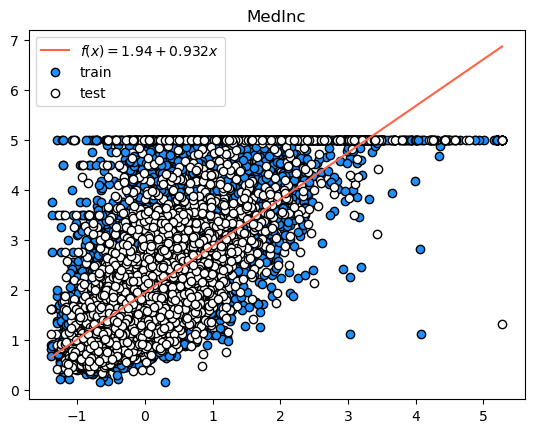

In [27]:
x_start = min(np.min(X_train_feature), np.min(X_test_feature))
x_end = max(np.max(X_train_feature), np.max(X_test_feature))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
plt.plot(x, model_one_feature.predict(x), color="tomato", label=f"$f(x) = {
         model_one_feature.intercept_:0.3} + {model_one_feature.coef_[0]:0.3} x$")

plt.scatter(X_train_feature, y_train, facecolor="dodgerblue",
            edgecolor="k", label="train")
plt.scatter(X_test_feature, y_test, facecolor="white",
            edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

En cuanto al modelo, podemos decir que el error cuadrático medio entre el conjunto de entrenamiento y de test, no varía mucho, lo cual es buen indicio de la capacidad de generalización de nuestro modelo, indicando que no está sufriendo de Overfitting. Por otra parte, el R2 (medido en la métrica de score) expresa la calidad del ajuste que en este caso es de 0.47, con lo cuál nuestro modelo explica el 47% de la variabilidad de los datos.


El error cuadrático medio, por sí sólo, no nos da un nivel de comparación y una métrica para decir si el modelo es bueno o malo. Nos sirve para comparar el error obtenido al entrenar y generalizar y corroborar que no sufra de overfitting. Pero, utilizando la fórmula del R2, podemos realizar una comparación entre el MSE calculado y el MSE "base", que es sencillamente la varianza de la variable target. Si el MSE del modelo es menor que el MSE base,el R2 será positivo más cercano a 1 y nuestro modelo será mejor que simplemente predecir la media.


![R-al-cuadrado](https://sitiobigdata.com/wp-content/uploads/2018/08/R-al-cuadrado.jpg)


In [28]:
# Calculamos la varianza de la variable target del conjunto de test
variance_train = np.var(y_train)
variance_test = np.var(y_test)

In [29]:
print(variance_train > train_error)
print(variance_test > val_error)

True
True


## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
   1. Instancie y entrene una regresión polinomial.
   2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
   3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.


Observamos nuevamente el conjunto de train y test


In [30]:
print(X_train_feature.shape)
print(X_test_feature.shape)

(15859, 1)
(3965, 1)


Y vamos a plantear distintos modelos de regresión polinomica, variando para cada uno de ellos el grado del polinomio, guardando en diferentes listas los resultados del error cuadrático medio, el score(R2) y la raíz del error cuadrático medio


In [31]:
def evaluate_polynomial_models(X_train, y_train, X_test, y_test, degrees):
    train_errors_one_feature = []
    test_errors_one_feature = []
    model_score = []
    train_errors_squared = []
    test_errors_squared = []

    for degree in degrees:
        # Armo el modelo con cada grado y ajusto
        pf = PolynomialFeatures(degree)
        lr = LinearRegression(fit_intercept=True)
        model = make_pipeline(pf, lr)
        model.fit(X_train, y_train)
        model_score.append(model.score(X_train, y_train))

        # Predecimos los valores de la variable target
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Calculamos los errores medios cuadrados:
        train_error = mean_squared_error(y_train, y_train_pred)
        test_error = mean_squared_error(y_test, y_test_pred)
        train_error_squared = np.sqrt(train_error)
        test_error_squared = np.sqrt(test_error)
        train_errors_one_feature.append(train_error)
        test_errors_one_feature.append(test_error)
        train_errors_squared.append(train_error_squared)
        test_errors_squared.append(test_error_squared)

    return {
        'Degree': degrees,
        'train_errors_one_feature': train_errors_one_feature,
        'test_errors_one_feature': test_errors_one_feature,
        'model_score': model_score,
        'train_errors_squared': train_errors_squared,
        'test_errors_squared': test_errors_squared
    }

Volcamos los datos a un dataframe para su mejor comprensión.


In [32]:
_dict_results = evaluate_polynomial_models(
    X_train_feature, y_train, X_test_feature, y_test, range(1, 10))

In [33]:
_df_results_models = pd.DataFrame({'Grado': _dict_results['Degree'], 'Score': _dict_results['model_score'], 'MSE-TRAIN': _dict_results['train_errors_one_feature'],
                                  'MSE-TEST': _dict_results['test_errors_one_feature'], 'RMSE-TRAIN': _dict_results['train_errors_squared'], 'RMSE-TEST': _dict_results['test_errors_squared']})

_df_results_models

,Grado,Score,MSE-TRAIN,MSE-TEST,RMSE-TRAIN,RMSE-TEST
0,1,0.47573757219916601446,0.70542677421917177050,0.67631289308488617973,0.83989688308694876451,0.82238244940227545055
1,2,0.47998421497314169848,0.69971265977104479816,0.66755731665108164474,0.83648829027730253749,0.81704180838625484196
2,3,0.48693543923155124808,0.69035936751614623841,0.65568524213056822436,0.83087867195887643579,0.80974393614930406660
3,4,0.48699785241186355211,0.69027538681083200345,0.65564781323973442273,0.83082813313634973351,0.80972082425965463681
4,5,0.48710551566790505351,0.69013051939446978800,0.65583510587194648878,0.83074094602015968736,0.80983646859841185162
5,6,0.48878095575843383269,0.68787611351721289488,0.65724914959765412537,0.82938297156212037464,0.81070904127045118059
6,7,0.49098884976825796222,0.68490525871897467436,0.65448475079626922124,0.82759003058215641069,0.80900231816495382642
7,8,0.49119011580422311525,0.68463444310644572255,0.65469148627979323329,0.82742639739522794162,0.80913007994993813021
8,9,0.49120656497808001806,0.68461230974910958214,0.65510262313174427717,0.82741302246768488882,0.80938410111129821534


Para evaluar el comportamiento del modelo al momento de generalizar a medida que aumentamos el grado del polinomio, podemos graficar las curvas del error y ver como se comportan.


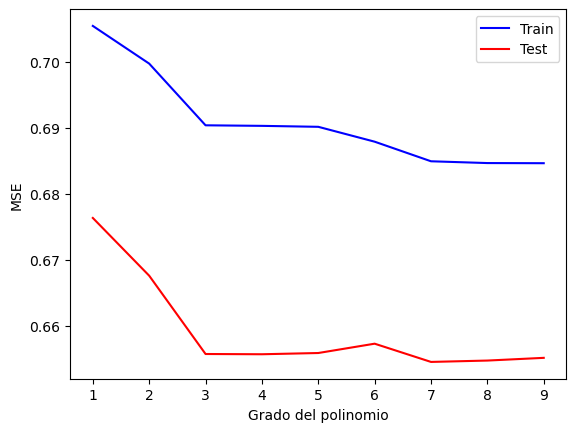

In [34]:
plt.plot(_dict_results['Degree'],
         _dict_results['train_errors_one_feature'], color="blue", label="Train")

plt.plot(_dict_results['Degree'],
         _dict_results['test_errors_one_feature'], color="red", label="Test")

plt.legend()

plt.xlabel("Grado del polinomio")

plt.ylabel("MSE")

plt.show()

Como podemos observar, al menos hasta el polinomio de grado 9, el modelo no sufre de overfitting, ya que hasta ese punto ambos errores (tanto del conjunto de datos de train como de test) disminuyen. En el polinomio de grado 10, el MSE aumenta levemente para el conjunto de datos de test, por lo tanto puede ser el punto de quiebre para la elección del modelo.


Por lo tanto, vamos a seleccionar el polinomio de grado 9 como definitivo.


In [35]:
degree = 9
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_feature, y_train)

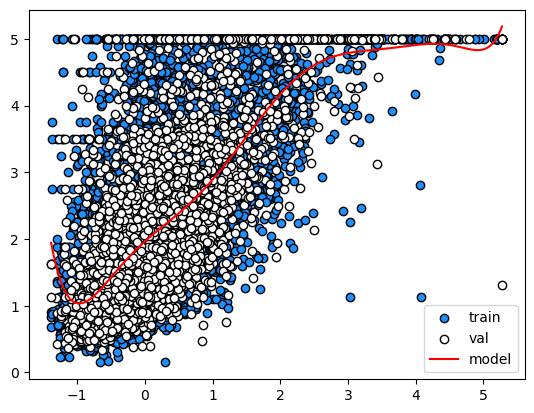

In [36]:
plt.scatter(X_train_feature, y_train, color="dodgerblue",
            edgecolor="k", label="train")

plt.scatter(X_test_feature, y_test, color="white", edgecolor="k", label="val")

plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
plt.legend()

plt.show()

El modelo obtenido parece funcionar correctamente a la hora de generalizar para nuevos conjuntos de datos, ya que aumentando el grado del polinomio hasta 9, disminute el MSE para el conjunto de entrenamiento como para el conjunto de test. Podría existir un modelo con un nivel de error menor, pero teniendo en cuenta el modelo elegido, podemos llegar a esa conclusión. Por otro lado, observando la gráfica, vemos como el modelo captura bien el efecto para valores altos de ingresos para los cuáles el valor de la propiedad se concentra en el valor máximo de estas.


## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?


In [37]:
feature_a = 'AveBedrms'
feature_b = 'MedInc'

X_train_multiple_features = np.array(X_train[[feature_a, feature_b]])
X_test_multiple_features = np.array(X_test[[feature_a, feature_b]])
X_train_multiple_features.shape, X_test_multiple_features.shape

# Ajustar y transformar los datos
X_train_multiple_features = scaler.fit_transform(X_train_multiple_features)
X_test_multiple_features = scaler.fit_transform(X_test_multiple_features)

Y armamos y ajustamos nuevamente el modelo


In [38]:
_dict_results_features = evaluate_polynomial_models(
    X_train_multiple_features, y_train, X_test_multiple_features, y_test, [1, 2, 3, 4, 5, 6, 7, 8, 9])

In [39]:
_df_results_more_features = pd.DataFrame({'Grado': _dict_results_features['Degree'], 'Score': _dict_results_features['model_score'], 'MSE-TRAIN': _dict_results_features['train_errors_one_feature'],
                                         'MSE-TEST': _dict_results_features['test_errors_one_feature'], 'RMSE-TRAIN': _dict_results_features['train_errors_squared'], 'RMSE-TEST': _dict_results_features['test_errors_squared']})

_df_results_more_features

,Grado,Score,MSE-TRAIN,MSE-TEST,RMSE-TRAIN,RMSE-TEST
0,1,0.47891027686572196220,0.70115770838535451670,0.67255065145825465578,0.83735160379935646979,0.82009185550050101021
1,2,0.48752671854867279944,0.68956376546797115701,0.66109178570093518612,0.83039976244455371290,0.81307551045455495053
2,3,0.49739410916230197834,0.67628659517802369727,0.64292223252860880578,0.82236646039221694693,0.80182431525154485019
3,4,0.49874983442216314078,0.67446238492362298178,0.65017280353069539789,0.82125658896816344789,0.80633293590842203269
4,5,0.50025636105994708558,0.67243526230332539839,0.64733305670217922145,0.82002150112257754522,0.80457010676645157599
5,6,0.50234896109299953526,0.66961954251726452103,0.72465740000820899613,0.81830284278943121734,0.85126811288113513054
6,7,0.50484075029474961838,0.66626668958443424629,0.65306062282323584789,0.81625160923849593431,0.80812166337949131734
7,8,0.50540242931620493749,0.66551091652262273080,1.25876235213918041822,0.81578852438767657240,1.12194578841367387234
8,9,0.50585738440377636671,0.66489874696245343522,2.99098390664216085000,0.81541323693109946102,1.72944612712919187913


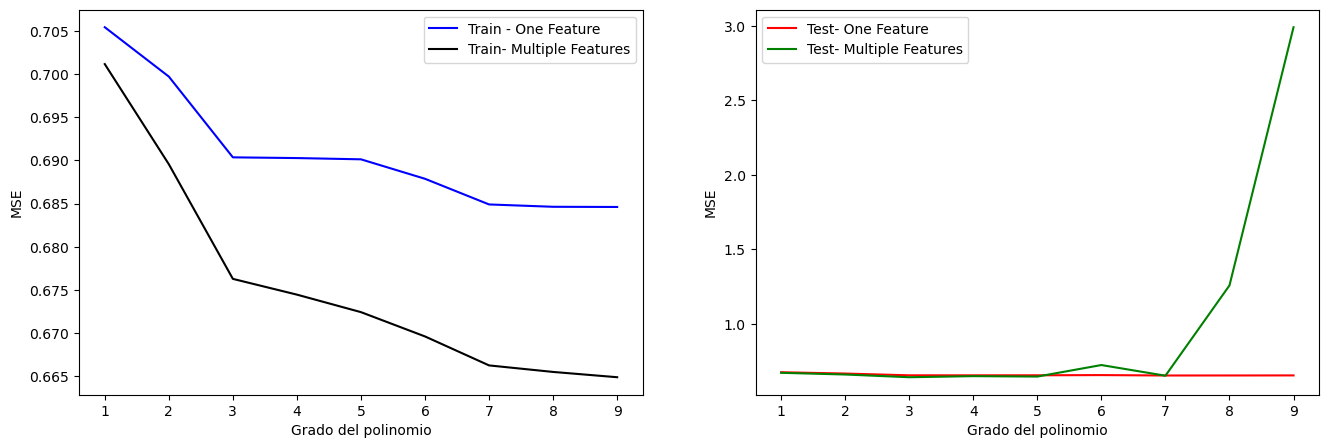

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

axs[0].plot(_dict_results['Degree'], _dict_results['train_errors_one_feature'],
            color="blue", label="Train - One Feature")
axs[1].plot(_dict_results['Degree'], _dict_results['test_errors_one_feature'],
            color="red", label="Test- One Feature")
axs[0].plot(_dict_results_features['Degree'], _dict_results_features['train_errors_one_feature'],
            color="black", label="Train- Multiple Features")
axs[1].plot(_dict_results_features['Degree'], _dict_results_features['test_errors_one_feature'],
            color="green", label="Test- Multiple Features")

for i in range(0, 2):
    axs[i].legend()
    axs[i].set_xlabel("Grado del polinomio")
    axs[i].set_ylabel("MSE")
plt.show()

Comparando los dos modelos, podemos ver que en el caso de aquel con 2 atributos, el MSE es menor para todo grado de polinomio. Sin embargo, a partir del polinomio de grado 7, comienza a evidenciarse Overfitting, ya que el MSE utilizando el conjunto de TEST se vuelve mayor y crece de forma abrupta. En cuanto a si obtuvimos un mejor modelo, podemos concluir que si, si nos quedamos con el modelo del polinomio de grado 7, ya que para ese nivel no se evidencia overfitting con el conjunto de TEST, el MSE es menor que en el modelo previo y el R2(score) es levemente mayor.


## Ejercicio 6: A todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.


En primer lugar vamos a escalar todos los atributos a utilizar, para asegurarnos que alguna variable no tenga más peso que otra por una cuestión de escalas. Dado que como vimos, existen valores outliers en los atributos, vamos a utilizar el método "RobustScaler" que nos proporciona Sklearn.


In [41]:
X_train_full_feature = np.array(X_train)
X_test_full_feature = np.array(X_test)
X_train_full_feature = scaler.fit_transform(X_train_full_feature)
X_test_full_feature = scaler.fit_transform(X_test_full_feature)

Luego, hacemos uso nuevamente de la función utilizada previamente e instanciamos las regresiones con grados 1 a 6


In [42]:
_dict_result_full_features = evaluate_polynomial_models(
    X_train_full_feature, y_train, X_test_full_feature, y_test, [1, 2, 3, 4, 5, 6])

Presentamos los resultados en un dataframe para su mejor entendimiento


In [43]:
_df_results_full_feature = pd.DataFrame({'Grado': _dict_result_full_features['Degree'], 'Score': _dict_result_full_features['model_score'], 'MSE-TRAIN': _dict_result_full_features['train_errors_one_feature'],
                                        'MSE-TEST': _dict_result_full_features['test_errors_one_feature'], 'RMSE-TRAIN': _dict_result_full_features['train_errors_squared'], 'RMSE-TEST': _dict_result_full_features['test_errors_squared']})

_df_results_full_feature

,Grado,Score,MSE-TRAIN,MSE-TEST,RMSE-TRAIN,RMSE-TEST
0,1,0.67276822005826941719,0.44031013230264848257,0.42350647318181466883,0.66355868791136207729,0.65077374961027323330
1,2,0.73334996734071489222,0.35879373079112936162,0.34385375720140826106,0.59899393218222951596,0.58639044774058879383
2,3,0.76163209712548529673,0.32073841626895677193,0.30829774862478043218,0.56633772280235472607,0.55524566511120143630
3,4,0.79602984456306269401,0.27445416866974808867,0.29819667302682156818,0.52388373583243452725,0.54607387140095031697
4,5,0.82872357683198427658,0.23046277644201398904,0.46601498858358147981,0.48006538767340223295,0.68265290491111330073
5,6,0.86515970542369990959,0.18143576383440182531,1.91391584991396834781,0.42595277183556606859,1.38344347550377655409


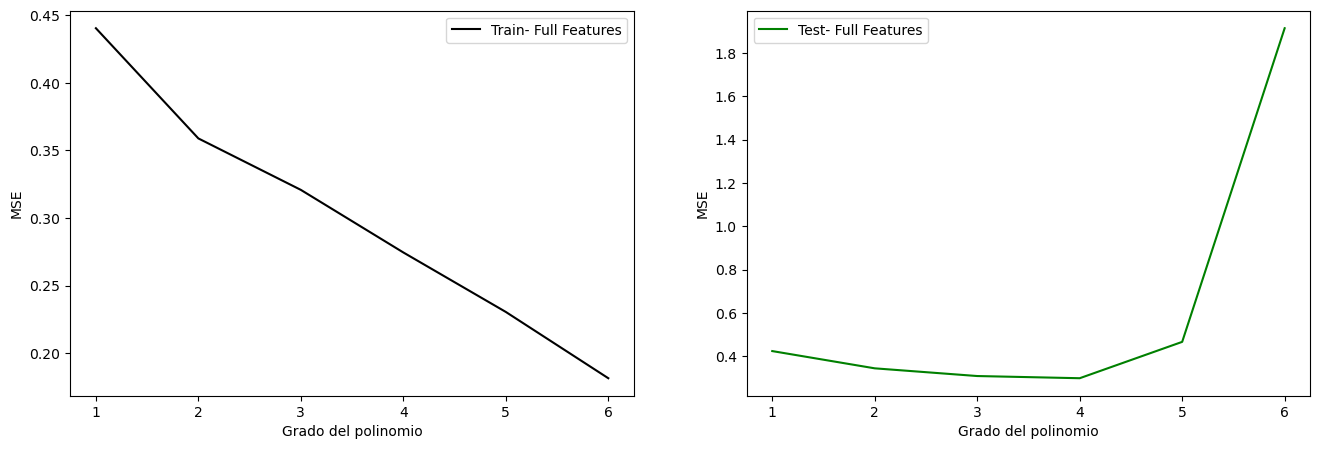

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

axs[0].plot(_dict_result_full_features['Degree'],
            _dict_result_full_features['train_errors_one_feature'], color="black", label="Train- Full Features")
axs[1].plot(_dict_result_full_features['Degree'],
            _dict_result_full_features['test_errors_one_feature'], color="green", label="Test- Full Features")

for i in range(0, 2):
    axs[i].legend()
    axs[i].set_xlabel("Grado del polinomio")
    axs[i].set_ylabel("MSE")
plt.show()

Podemos ver, tanto por los resultados numéricos como en los gráficos, que hasta el polinomio de grado 4, los resultados son mejores que en los modelos planteados anteriormente y el modelo no genera un sobreajuste. A partir del grado 5, el error en el conjunto de entrenamiento sigue bajando pero el modelo sobreajusta y aumenta abruptamente el error con los nuevos datos de entrenamiento.


Alternativamente, podemos plantear el método "Gridsearch" para ver si nos arroja el mismo modelo(grado 4) cómo el mejor de ellos. Vamos a pedirle que como hiperparámetro a modificar elija el grado, y como scoring tenga en cuenta el negativo del MSE.


In [45]:
param_grid = {
    'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6]
}

In [46]:
model = make_pipeline(PolynomialFeatures(), LinearRegression())

In [47]:
grid_search = GridSearchCV(model, param_grid, cv=5,
                           scoring='neg_mean_squared_error')

In [48]:
grid_search.fit(X_train_full_feature, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6]},
             scoring='neg_mean_squared_error')

In [49]:
# Iteración elegida
best_params = grid_search.best_params_
best_params

{'polynomialfeatures__degree': 4}

In [50]:
score = grid_search.score(X_test_full_feature, y_test)
score

-0.29819667302682157

Vemos que eligio dicho modelo, de polinomio de grado 4, que arroja un error para el conjunto de test de 0.33.


## Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?


Para la resolución de este ejercicio, necesitamos instancias una regresión regularizada por el parámetro alpha que penalice los coeficientes del polinomio


In [51]:
def evaluate_polynomial_models_ridge(X_train_feature, y_train, X_test_feature, y_test, degrees, alphas):
    results = {
        'Degree': [],
        'Alpha': [],
        'train_errors_one_feature': [],
        'test_errors_one_feature': [],
        'model_score': [],
        'train_errors_squared': [],
        'test_errors_squared': []
    }

    for degree in degrees:
        for alpha in alphas:
            # Armo el modelo con cada grado y ajusto
            pf = PolynomialFeatures(degree)
            ridge = Ridge(alpha=alpha, fit_intercept=True)
            model = make_pipeline(pf, ridge)
            model.fit(X_train_feature, y_train)

            # Predecimos los valores de la variable target
            y_train_pred = model.predict(X_train_feature)
            y_test_pred = model.predict(X_test_feature)

            # Calculamos los errores medios cuadrados:
            train_error = mean_squared_error(y_train, y_train_pred)
            test_error = mean_squared_error(y_test, y_test_pred)
            train_error_squared = np.sqrt(train_error)
            test_error_squared = np.sqrt(test_error)

            # Almacenamos los resultados
            results['Degree'].append(degree)
            results['Alpha'].append(alpha)
            results['train_errors_one_feature'].append(train_error)
            results['test_errors_one_feature'].append(test_error)
            results['model_score'].append(
                model.score(X_train_feature, y_train))
            results['train_errors_squared'].append(train_error_squared)
            results['test_errors_squared'].append(test_error_squared)

    return results

In [54]:
_dict_results_features_ridge = evaluate_polynomial_models_ridge(X_train_multiple_features, y_train, X_test_multiple_features, y_test, [
                                                                1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [0.05, 0.1, 0.15, 0.5, 10, 12])

C:\Users\juans\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.14268e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\juans\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.28536e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\juans\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.42804e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\juans\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.40594e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\juans\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:21

In [55]:
_df_results_more_features_ridge = pd.DataFrame({'Grado': _dict_results_features_ridge['Degree'], 'Alpha': _dict_results_features_ridge['Alpha'], 'Score': _dict_results_features_ridge['model_score'], 'MSE-TRAIN': _dict_results_features_ridge[
                                               'train_errors_one_feature'], 'MSE-TEST': _dict_results_features_ridge['test_errors_one_feature'], 'RMSE-TRAIN': _dict_results_features_ridge['train_errors_squared'], 'RMSE-TEST': _dict_results_features_ridge['test_errors_squared']})

_df_results_more_features_ridge

,Grado,Alpha,Score,MSE-TRAIN,MSE-TEST,RMSE-TRAIN,RMSE-TEST
0,1,0.05000000000000000278,0.47891027685609732778,0.70115770839830493522,0.67255051546431598997,0.83735160380708950623,0.82009177258665144628
1,1,0.10000000000000000555,0.47891027682722353553,0.70115770843715641281,0.67255037949887674920,0.83735160383028850450,0.82009168969016921213
2,1,0.14999999999999999445,0.47891027677910136262,0.70115770850190761720,0.67255024356193615631,0.83735160386895279849,0.82009160681105386370
3,1,0.50000000000000000000,0.47891027590333312691,0.70115770968030677324,0.67254929280124631230,0.83735160457259938394,0.82009102714347892338
4,1,10.00000000000000000000,0.47890989258827343367,0.70115822545388073461,0.67252401878967682514,0.83735191255163488044,0.82007561772660741983
5,1,12.00000000000000000000,0.47890972371143547548,0.70115845268787024835,0.67251882851139155317,0.83735204823769926463,0.82007245320849031511
6,2,0.05000000000000000278,0.48752671852560236498,0.68956376549901388096,0.66109191269758549314,0.83039976246324509468,0.81307558855101869089
7,2,0.10000000000000000555,0.48752671845639272696,0.68956376559213961031,0.66109203975400354647,0.83039976251931790774,0.81307566668422903700
8,2,0.14999999999999999445,0.48752671834104666093,0.68956376574734468132,0.66109216687018568237,0.83039976261276993164,0.81307574485418376842
9,2,0.50000000000000000000,0.48752671624202947864,0.68956376857169920935,0.66109305835654885719,0.83039976431336925966,0.81307629307251905182
